### IMPORT ALL  THE NECCESSAR LIBRARIES TO BE USED 

In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

### IMPORT THE DATA SET

In [2]:
H_D = pd.read_csv("/Users/keksmacbookair/Desktop/COURSE_WORKS/course_work_sem_2/Probability_and_statistics/data_Sets/Heart_disease.csv")

### CHECK FOR MISSING VALUES 

In [3]:
##EDA 
H_D_missing = H_D.isna().sum()
H_D_missing
#There is no missing data in the data set

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## VISUALISE THE DATA

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

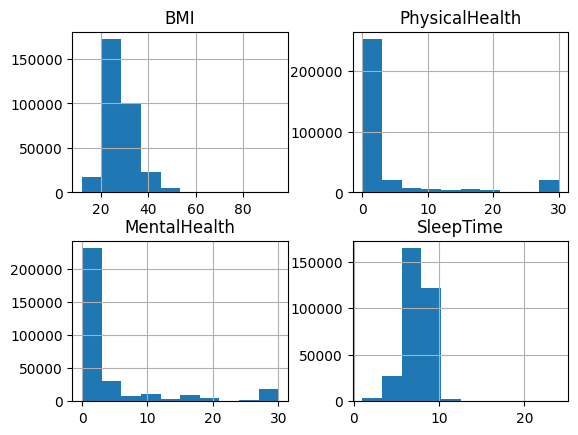

In [5]:
H_D.hist()


- BMI , Mental Health and Physical Health are positively squed

In [6]:
H_D.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## REMOVE THE DUPLICATE DATA 

In [7]:
H_D_new = H_D.drop_duplicates()

In [8]:

H_D_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

# Number 1
# It is believed that variables "BMI" and "AgeCategory" are key indicators of "KidneyDisease". Is this true? 

In [11]:
# Statistical relationship between BMI and KidneyDisease
from scipy.stats import f_oneway

def anova(H_D_new, BMI, KidneyDisease):
    Group_data = [
        group[BMI].values for _, group in H_D_new.groupby(KidneyDisease)
    ]
    f_starts, p_value = f_oneway(*Group_data)
    if p_value > 0.05:
        print(f"p_value is {p_value} hence {BMI} is not correlated with {KidneyDisease}.")
    elif p_value < 0.05:
        print(f"p_value is {p_value} hence {BMI} is correlated with {KidneyDisease}.")

anova(H_D_new, 'BMI', 'KidneyDisease')


p_value is 4.346009891819939e-152 hence BMI is correlated with KidneyDisease.


In [12]:
# Statistical relationship between AgeCategory and KidneyDisease
AGE_K = pd.crosstab(index = H_D_new['AgeCategory'], columns=H_D_new['KidneyDisease'])

from scipy.stats import chi2_contingency
chi_sq_result = chi2_contingency(AGE_K)
print(f"p_value is {chi_sq_result[1]}.")


p_value is 0.0.


# Number 2
# Explain the distribution of probability of any continuous variable

In [19]:
H_D_new.dtypes
H_D_new
H_D_new['PhysicalHealth'].describe()

count    301717.000000
mean          3.572298
std           8.140656
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: PhysicalHealth, dtype: float64

In [20]:
## Discretize the cont feature into bins
bins = [0, 10, 20, 30]
labels = ['0-10', '10-20', '20-30']

## create a new column carat_bin
H_D_new['physical_bin'] = pd.cut(H_D_new['PhysicalHealth'], bins = bins, labels=labels, right=False)

## calculating the Marginal Probabilities
physical_prob = H_D_new['physical_bin'].value_counts(normalize=True).sort_index()
physical_prob

/var/folders/qp/6vt7x7fn0b15mx5939mthnqw0000gn/T/ipykernel_32035/2676357415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H_D_new['physical_bin'] = pd.cut(H_D_new['PhysicalHealth'], bins = bins, labels=labels, right=False)


physical_bin
0-10     0.926899
10-20    0.051670
20-30    0.021431
Name: proportion, dtype: float64

# Number 3
# What is the probability that a person who smokes has SkinCancer? 

In [21]:
joint_event = H_D_new[(H_D_new['Smoking']=='Yes')&(H_D_new['SkinCancer']=='Yes')]
joint_probability = len(joint_event)/len(H_D_new)

smokes = H_D_new[H_D_new['Smoking'] == 'Yes']
smokes_probability = len(smokes)/len(H_D_new)

cond_prob = joint_probability/smokes_probability
print(f"The probability that a person who smokes has Skin Cancer is {cond_prob}")



The probability that a person who smokes has Skin Cancer is 0.107625289431341


# Number 4
# Explain the relationship between any two continuous variables?

In [24]:
# Statistical relationship between BMI and PhysicalHealth
grouped_data = ['BMI', 'PhysicalHealth']
correlation = H_D_new[grouped_data].corr()
correlation

,BMI,PhysicalHealth
BMI,1.000000,0.103813
PhysicalHealth,0.103813,1.000000


# Number 5
# Based on the variable “HeartDisease”, which "GenHealth" status  would you advise patients to maintain?

In [ ]:
import

# KAWOOMA ELIJAH
## B29158
## M24B38/23
## kaizzielijah@gmail.com
## 0787106109